In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
#内嵌绘画
import numpy as np
import sklearn 
import os
import pandas as pd
import time
import sys   #sys是system的缩写，用来获取操作系统和编译器的一些配置，设置及操作,如判断文件和文件夹是否存在，创建文件文件夹，获取系统版本之类的操作
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1)

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()

x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
"""x_valid=x_valid/255
x_train=x_train/255
x_test=x_test/255"""
#x=(x-u)/std
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.3))    
model.add(tf.keras.layers.Dense(10,activation='softmax'))    


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [8]:
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

history=model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=10,callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4938 - acc: 0.8399 - val_loss: 0.5676 - val_acc: 0.8594
Epoch 2/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.4496 - acc: 0.8535 - val_loss: 0.5119 - val_acc: 0.8714
Epoch 3/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.5082 - acc: 0.8496 - val_loss: 0.5657 - val_acc: 0.8640
Epoch 4/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4123 - acc: 0.8654 - val_loss: 0.4794 - val_acc: 0.8708
Epoch 5/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.4102 - acc: 0.8659 - val_loss: 0.5825 - val_acc: 0.8594
Epoch 6/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4080 - acc: 0.8681 - val_loss: 0.5147 - val_acc: 0.8658
Epoch 7/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.4162 - acc: 0.8641 - val_lo

In [9]:
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.6874 - acc: 0.8495


[0.6873839354276657, 0.8495]

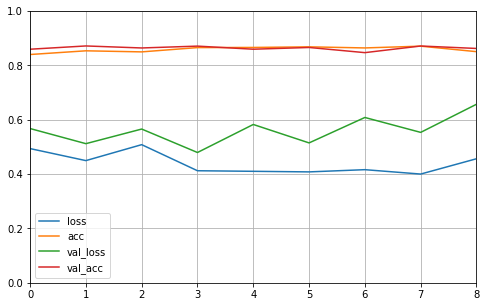

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)